# Flights Data Exploration
## by Thays Martinez

## Preliminary Wrangling

This document explores a dataset containing flight delays of 2+ hours registered between 1st of January 2015 until 31st of December 2019 for approximately 1.3 million flights within the United States and Canada.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# Load the dataset into a pandas DataFrame
flights = pd.read_csv('flights.csv')

In [3]:
# High-level overview of data shape and composition
pd.set_option('display.max_columns', 25)
print(flights.shape)
print(flights.dtypes)

(1272355, 23)
fl_date                object
origin_airport         object
origin_city            object
origin_state           object
dest_airport           object
dest_city              object
dest_state             object
crs_dep_time           object
actual_dep_time        object
dep_delay               int64
taxi_out                int64
wheels_off             object
wheels_on              object
taxi_in                 int64
crs_arr_time           object
actual_arr_time        object
arr_delay               int64
crs_elapsed_time        int64
actual_elapsed_time     int64
air_time                int64
distance                int64
delay_cause            object
delay_duration          int64
dtype: object


In [4]:
# Convert to datetime
flights['fl_date'] = pd.to_datetime(flights['fl_date'])

# Convert to category
flights['delay_cause'] = flights['delay_cause'].astype('category')

# Convert columns to time timestamp
columns = ['crs_dep_time', 'actual_dep_time', 'wheels_off', 
           'wheels_on', 'crs_arr_time', 'actual_arr_time']

for column in columns:
    flights[column] = flights[column].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
    # flights[column] = pd.to_datetime(flights[column], format='%H%M').dt.time

# Convert to int
columns = ['taxi_out', 'taxi_in', 'diverted', 'dep_delay', 
           'arr_delay', 'crs_elapsed_time', 'actual_elapsed_time', 
           'air_time', 'distance', 'delay_duration']

converter = lambda x: x.astype(int) if x.name in columns else x

flights = flights.apply(converter)

In [5]:
# Display first 5 rows
flights.head()

,fl_date,origin_airport,origin_city,origin_state,dest_airport,dest_city,dest_state,crs_dep_time,actual_dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,actual_arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delay_cause,delay_duration
0,2019-03-01,ATL,Atlanta,GA,TYS,Knoxville,TN,12:19:00,15:28:00,189,16,15:44:00,16:17:00,2,13:15:00,16:19:00,184,56,51,33,152,Carrier,184
1,2019-03-01,LGA,New York,NY,ORF,Norfolk,VA,16:59:00,19:13:00,134,36,19:49:00,20:44:00,15,18:34:00,20:59:00,145,95,106,55,296,Carrier,22
2,2019-03-01,ATL,Atlanta,GA,XNA,Fayetteville,AR,13:51:00,16:02:00,131,14,16:16:00,16:51:00,4,14:50:00,16:55:00,125,119,113,95,589,Carrier,119
3,2019-03-01,LGA,New York,NY,PIT,Pittsburgh,PA,11:00:00,12:41:00,101,67,13:48:00,14:55:00,21,12:58:00,15:16:00,138,118,155,67,335,Carrier,1
4,2019-03-01,IND,Indianapolis,IN,RDU,Raleigh/Durham,NC,17:35:00,19:34:00,119,10,19:44:00,21:03:00,11,19:10:00,21:14:00,124,95,100,79,489,Carrier,21


In [6]:
# Overview after data transformation
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272355 entries, 0 to 1272354
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   fl_date              1272355 non-null  datetime64[ns]
 1   origin_airport       1272355 non-null  object        
 2   origin_city          1272355 non-null  object        
 3   origin_state         1272355 non-null  object        
 4   dest_airport         1272355 non-null  object        
 5   dest_city            1272355 non-null  object        
 6   dest_state           1272355 non-null  object        
 7   crs_dep_time         1272355 non-null  object        
 8   actual_dep_time      1272355 non-null  object        
 9   dep_delay            1272355 non-null  int64         
 10  taxi_out             1272355 non-null  int64         
 11  wheels_off           1272355 non-null  object        
 12  wheels_on            1272355 non-null  object        
 1

In [7]:
# Descriptive statistics for numeric variables
flights.describe()

,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delay_duration
count,1.272355e+06,1.272355e+06,1.272355e+06,1.272355e+06,1.272355e+06,1.272355e+06,1.272355e+06,1.272355e+06,1.272355e+06
mean,2.049701e+02,2.503002e+01,9.951415e+00,2.114902e+02,1.450754e+02,1.515945e+02,1.166131e+02,8.194772e+02,1.215906e+02
std,1.422501e+02,2.101424e+01,1.253035e+01,1.387694e+02,7.338261e+01,7.701455e+01,7.214453e+01,5.961651e+02,1.357414e+02
min,-2.000000e+01,1.000000e+00,1.000000e+00,1.200000e+02,-9.900000e+01,1.600000e+01,8.000000e+00,3.100000e+01,1.000000e+00
25%,1.360000e+02,1.300000e+01,5.000000e+00,1.400000e+02,9.100000e+01,9.500000e+01,6.400000e+01,3.780000e+02,2.100000e+01
50%,1.670000e+02,1.800000e+01,7.000000e+00,1.700000e+02,1.280000e+02,1.350000e+02,1.000000e+02,6.740000e+02,1.120000e+02
75%,2.240000e+02,2.900000e+01,1.000000e+01,2.260000e+02,1.750000e+02,1.850000e+02,1.460000e+02,1.055000e+03,1.640000e+02
max,2.710000e+03,2.270000e+02,4.140000e+02,2.695000e+03,7.180000e+02,1.604000e+03,1.557000e+03,5.095000e+03,2.695000e+03


### What is the structure of your dataset?

This dataset contains 1,272,355 flight delays which delay is equal or more than 2 hours. It is comprised of 23 features:

- fl_date:
- origin_airport:
- origin_city:
- origin_state:
- dest_airport:
- dest_city:
- dest_state:
- crs_dep_time:
- actual_dep_time:
- dep_delay:
- taxi_out:
- wheels_off:
- wheels_on:
- taxi_in:
- crs_arr_time:
- actual_arr_time:
- arr_delay:
- crs_elapsed_time: CRS elapsed time of flight, in minutes
- actual_elapsed_time: elapsed time of flight, in minutes
- air_time: flight time, in minutes
- distance: distance between airports (miles)
- delay_cause: causes of delay in broad categories that were created by the Air Carrier On-Time Reporting Advisory Committee
- delay_duration: delay in minutes

Most variables are either numeric or datetime types. The variable **delay_cause** is categorical and has the following classification:

- **Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Late Aircraft:** A previous flight with same aircraft arrived late, causing the present flight to depart late.
- **NAS:** Stands for National Aviation System. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- **Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting flight delays of 2 hours or more of the flights in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Although delay cause will give us a good indication of the reason a flight is delayed, I am also expecting that flight date, origin state, air time and distance will have effects on flight's delay duration. I also think that other features will have effects on the delay's duration, though to a much smaller degree.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [79]:
def chart_props(df, col_name):
    # create the plot
    base_color = sb.color_palette()[0]
    col_order = df[col_name].value_counts().index
    plt.figure(figsize=[8, 5])
    sb.countplot(data=df, x=col_name, color=base_color, order=delay_order)
    
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[col_name].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        
        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)
        
        # print the annotation just below the top of the bar
        plt.text(loc, count, pct_string, ha = 'center', verticalalignment='bottom', color = 'black')

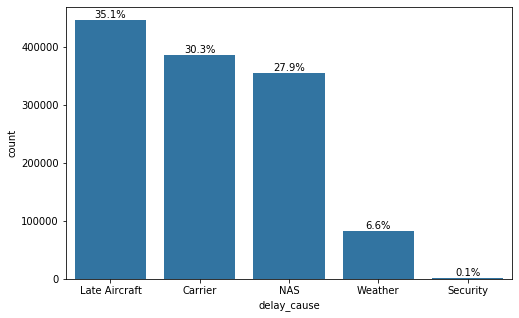

In [80]:
# Generate chart
chart_props(flights, 'delay_cause')

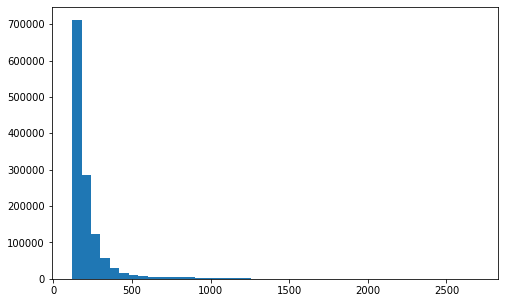

In [87]:
bin_edges = np.arange(flights.arr_delay.min(), flights.arr_delay.max()+60, 60)
plt.figure(figsize=[8, 5])
plt.hist(data=flights, x='arr_delay', bins=bin_edges);

In [84]:
# there's a long tail in the distribution, so let's put it on a log scale instead


Late Aircraft accounts for 35% of delays, followed by Carrier and NAS. These 3 categories consists of more than 90% of delays of more than 2 hours. 
Next, the CRS departure time.  

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

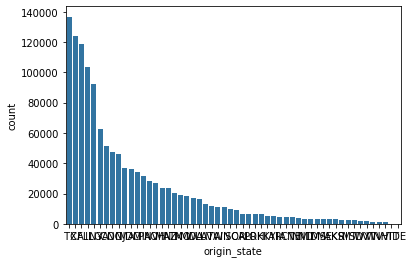

In [15]:
state_order = flights.origin_state.value_counts().index
sb.countplot(data=flights, x='origin_state', color=base_color, order=state_order);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!